[u'bins', u'data', u'ebeam', u'event_time', u'evr', u'fiducials', u'gas_detector', u'phase_cav']
(20, 8, 512, 1024)
Print bins array:
[2541. 3019. 3279. 3224. 3350. 3354. 3580. 3380. 3480. 3456. 3438. 3295.
 3416. 3379. 3462. 3640. 3496. 3693. 3819. 3846.]
total number of shots = 68147 
(20,)
float64
(20, 8, 512, 1024)
avg xint = 0


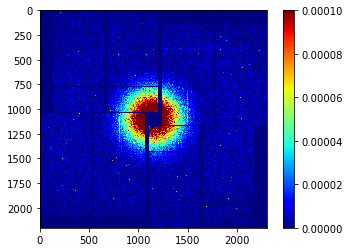

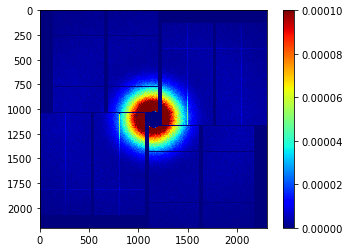

In [9]:
import numpy as np
import h5py
from psana import *
#import matplotlib as mpl
import matplotlib.pyplot as plt
plt.switch_backend('agg')

### 5/5/22 (Day 4) TN
### Learning manipulation of h5 file data from SLAC (Nate)

"""
### From h5py:
An HDF5 file is a container for two kinds of objects: datasets, which are array-like collections of data, and groups, which are folder-like containers that hold datasets and other groups. The most fundamental thing to remember when using h5py is:

    Groups work like dictionaries, and datasets work like NumPy arrays

"""

# load h5 file
fname = 'xint_binning_run43.h5'
f = h5py.File(fname, 'r')

# print database keys
print(f.keys())
### Output: <KeysViewHDF5 ['autocorrelations', 'dark_img', 'darkshots', 'diode_bins', 'ebeam', 'event_time', 'evr', 'fiducials', 'gas_detector', 'phase_cav', 'xrayons', 'xrayonshots']>

# Randomly choose to look at xrayons dataset
#uvon = f['uvons']
#uvoff = f['uvoffs']
#dset = uvon[:,:,:] + uvoff[:,:,:]
bins = f['bins']
dset = f['data']
print(dset.shape)

# The object we obtained isn’t an array, but an HDF5 dataset. Like NumPy arrays, datasets have both a shape and a data type:
#print(dset.shape)
#print(dset.dtype)
print('Print bins array:')
print(bins[:])
print('total number of shots = %d ' % np.sum(bins))
print(bins.shape)
print(bins.dtype)

# print some elements of the array
# print(dset[0])
# print(dset[:])
# ok...

#dset = np.transpose(dset, (1,2,3,0) )
print(dset.shape)

print('avg xint = %d' % np.average(dset))

experiment = 'cxilv0418'
run = 43
ds = DataSource('exp=%s:run=%d'% (experiment, run))
evt0 = ds.events().next()
det = Detector('DetInfo(CxiDs1.0:Jungfrau.0)', ds.env())
# Bin statistics plot
i = 0
img3 = det.image(evt0, dset[i,:,:,:]/bins[i])
plt.figure()
plt.imshow(img3, cmap='jet')
plt.clim(min(img3.min(), 0), img3.max())
plt.clim(0, 0.0001)
plt.colorbar()
plt.title('')
plt.show()

i = 19
img3 = det.image(evt0, dset[i,:,:,:]/bins[i])
plt.figure()
plt.imshow(img3, cmap='jet')
plt.clim(min(img3.min(), 0), img3.max())
plt.clim(0, 0.0001)
plt.colorbar()
plt.title('')
plt.show()

#plt.title('')
#plt.xlim(0.8,1.2)